In [3]:
import os

# Define the dataset path
video_folder =  r"C:\Users\Arakirukkan\Documents\project"  
# Define the classes (subfolder names)
classes = ['sitting', 'walking', 'standing']

# Dictionary to store videos for each class
video_files = {cls: [] for cls in classes}

# Load videos from each class folder
for cls in classes:
    class_folder = os.path.join(video_folder, cls)
    
    # Check if the class folder exists
    if not os.path.exists(class_folder):
        print(f"Warning: Class folder '{cls}' not found in {video_folder}.")
        continue
    
    # Collect video files in this class folder
    valid_extensions = ('.mp4', '.avi', '.mov', '.mkv')  # Add other formats as needed
    video_files[cls] = [
        os.path.join(class_folder, f)
        for f in os.listdir(class_folder)
        if f.lower().endswith(valid_extensions)
    ]

# Print the number of videos found for each class
for cls, files in video_files.items():
    print(f"Class '{cls}': {len(files)} videos")
    for i, video in enumerate(files[:5], 1):  # Print the first 5 videos as a preview
        print(f"  {i}. {os.path.basename(video)}")

# Total videos
total_videos = sum(len(files) for files in video_files.values())
print(f"Total videos found: {total_videos}")


Class 'sitting': 15 videos
  1. Sitting (10).mp4
  2. Sitting (107).mp4
  3. Sitting (113).mp4
  4. Sitting (121).mp4
  5. Sitting (123).mp4
Class 'walking': 15 videos
  1. Walking (1).mp4
  2. Walking (106).mp4
  3. Walking (111).mp4
  4. Walking (17).mp4
  5. Walking (28).mp4
Class 'standing': 15 videos
  1. Standing Still (102).mp4
  2. Standing Still (109).mp4
  3. Standing Still (114).mp4
  4. Standing Still (115).mp4
  5. Standing Still (29).mp4
Total videos found: 45


In [7]:
import cv2

# Define the output folder for preprocessed videos
preprocessed_folder = 'path/to/save/preprocessed/videos'

# Create output folder structure if not exists
if not os.path.exists(preprocessed_folder):
    os.makedirs(preprocessed_folder)

for cls in classes:  # Iterate through each class
    class_input_folder = os.path.join(video_folder, cls)
    class_output_folder = os.path.join(preprocessed_folder, cls)
    
    # Create the output folder for the class if it doesn't exist
    if not os.path.exists(class_output_folder):
        os.makedirs(class_output_folder)

    for video in video_files[cls]:
        input_path = video  # Full path of the input video
        output_path = os.path.join(class_output_folder, os.path.basename(video))  # Save with the same filename
        
        # Resize video
        def resize_video(input_path, output_path, resolution=(720, 1280)):
            cap = cv2.VideoCapture(input_path)
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            out = cv2.VideoWriter(output_path, fourcc, cap.get(cv2.CAP_PROP_FPS), resolution)

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                resized_frame = cv2.resize(frame, resolution)  # Resize the frame
                out.write(resized_frame)  # Write the resized frame
            
            cap.release()
            out.release()
        
        # Call the function for resizing
        resize_video(input_path, output_path)
        print(f"Resized and saved: {output_path}")

print("All videos resized and saved.")


Resized and saved: path/to/save/preprocessed/videos\sitting\Sitting (10).mp4
Resized and saved: path/to/save/preprocessed/videos\sitting\Sitting (107).mp4
Resized and saved: path/to/save/preprocessed/videos\sitting\Sitting (113).mp4
Resized and saved: path/to/save/preprocessed/videos\sitting\Sitting (121).mp4
Resized and saved: path/to/save/preprocessed/videos\sitting\Sitting (123).mp4
Resized and saved: path/to/save/preprocessed/videos\sitting\Sitting (20).mp4
Resized and saved: path/to/save/preprocessed/videos\sitting\Sitting (23).mp4
Resized and saved: path/to/save/preprocessed/videos\sitting\Sitting (38).mp4
Resized and saved: path/to/save/preprocessed/videos\sitting\Sitting (45).mp4
Resized and saved: path/to/save/preprocessed/videos\sitting\Sitting (58).mp4
Resized and saved: path/to/save/preprocessed/videos\sitting\Sitting (6).mp4
Resized and saved: path/to/save/preprocessed/videos\sitting\Sitting (64).mp4
Resized and saved: path/to/save/preprocessed/videos\sitting\Sitting (84).

In [9]:
import mediapipe as mp
import numpy as np

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Define the folder to save extracted landmarks
landmark_folder = 'path/to/save/landmarks'

# Create output folder structure if not exists
if not os.path.exists(landmark_folder):
    os.makedirs(landmark_folder)

for cls in classes:  # Iterate through each class
    class_input_folder = os.path.join(preprocessed_folder, cls)
    class_output_folder = os.path.join(landmark_folder, cls)
    
    # Create the output folder for the class if it doesn't exist
    if not os.path.exists(class_output_folder):
        os.makedirs(class_output_folder)

    for video in os.listdir(class_input_folder):
        input_path = os.path.join(class_input_folder, video)
        output_path = os.path.join(class_output_folder, video.split('.')[0] + '.npy')  # Save as .npy file
        
        def extract_landmarks(video_path):
            cap = cv2.VideoCapture(video_path)
            landmarks = []

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                # Convert the frame to RGB
                rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                results = pose.process(rgb_frame)

                if results.pose_landmarks:
                    # Extract landmarks as a flattened array
                    landmarks.append(
                        np.array([[lm.x, lm.y, lm.z] for lm in results.pose_landmarks.landmark]).flatten()
                    )
            
            cap.release()
            return np.array(landmarks)
        
        # Extract landmarks
        landmarks = extract_landmarks(input_path)
        
        # Save landmarks to .npy file
        np.save(output_path, landmarks)
        print(f"Landmarks extracted and saved: {output_path}")

print("All landmarks extracted and saved.")


Landmarks extracted and saved: path/to/save/landmarks\sitting\Sitting (10).npy
Landmarks extracted and saved: path/to/save/landmarks\sitting\Sitting (107).npy
Landmarks extracted and saved: path/to/save/landmarks\sitting\Sitting (113).npy
Landmarks extracted and saved: path/to/save/landmarks\sitting\Sitting (121).npy
Landmarks extracted and saved: path/to/save/landmarks\sitting\Sitting (123).npy
Landmarks extracted and saved: path/to/save/landmarks\sitting\Sitting (20).npy
Landmarks extracted and saved: path/to/save/landmarks\sitting\Sitting (23).npy
Landmarks extracted and saved: path/to/save/landmarks\sitting\Sitting (38).npy
Landmarks extracted and saved: path/to/save/landmarks\sitting\Sitting (45).npy
Landmarks extracted and saved: path/to/save/landmarks\sitting\Sitting (58).npy
Landmarks extracted and saved: path/to/save/landmarks\sitting\Sitting (6).npy
Landmarks extracted and saved: path/to/save/landmarks\sitting\Sitting (64).npy
Landmarks extracted and saved: path/to/save/landm

In [15]:
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras.utils import to_categorical

# Define the label mapping
class_mapping = {'sitting': 0, 'standing': 1, 'walking': 2}
classes = list(class_mapping.keys())  # Extract the class names

# Load landmarks and assign labels
landmark_folder = r"C:\Users\Arakirukkan\path\to\save\landmarks"  # Replace with the correct path to your landmarks
data = []
labels = []

for cls in classes:  # Iterate through each class
    class_folder = os.path.join(landmark_folder, cls)
    class_label = class_mapping[cls]  # Get the label for the class

    # Get all .npy files in the class folder
    landmark_files = glob.glob(os.path.join(class_folder, '*.npy'))

    for file in landmark_files:
        landmarks = np.load(file)  # Load the landmarks from the file

        # Create sequences of 30 frames (assumes sequential frames are meaningful)
        for i in range(0, len(landmarks) - 30, 30):  # Adjust step size as needed
            data.append(landmarks[i:i+30])  # Append 30-frame sequences
            labels.append(class_label)  # Append the corresponding label

# Convert to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Print dataset shape
print(f"Data shape: {data.shape}")  # (num_samples, sequence_length, num_features)
print(f"Labels shape: {labels.shape}")

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Train data shape: {X_train.shape}, Train labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

# Convert labels to one-hot encoding
num_classes = len(class_mapping)  # Number of classes (3: sitting, standing, walking)
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

# Define the CNN + LSTM model
model = Sequential()

# TimeDistributed CNN for feature extraction
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu'), input_shape=(30, 99, 1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

# LSTM for temporal analysis
model.add(LSTM(128, return_sequences=False))  # Single output after processing the sequence

# Fully connected layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Reshape input data for the model
X_train_reshaped = X_train[..., np.newaxis]  # Add a channel dimension
X_test_reshaped = X_test[..., np.newaxis]

# Train the model
history = model.fit(
    X_train_reshaped,
    y_train_onehot,
    validation_data=(X_test_reshaped, y_test_onehot),
    epochs=20,
    batch_size=32,
    verbose=1
)


Data shape: (391, 30, 99)
Labels shape: (391,)
Train data shape: (312, 30, 99), Train labels shape: (312,)
Test data shape: (79, 30, 99), Test labels shape: (79,)


C:\Users\Arakirukkan\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 30, 97, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 30, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 30, 3072)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │       1,638,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,656,067 (6.32 MB)

 Trainable params: 1,656,067 (6.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 562ms/step - accuracy: 0.3917 - loss: 1.0685 - val_accuracy: 0.8101 - val_loss: 0.6504
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 371ms/step - accuracy: 0.8411 - loss: 0.5578 - val_accuracy: 0.7342 - val_loss: 0.7010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 373ms/step - accuracy: 0.7997 - loss: 0.5198 - val_accuracy: 0.8101 - val_loss: 0.4768
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 373ms/step - accuracy: 0.8218 - loss: 0.4391 - val_accuracy: 0.8481 - val_loss: 0.3817
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 373ms/step - accuracy: 0.8348 - loss: 0.4186 - val_accuracy: 0.9367 - val_loss: 0.2131
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 364ms/step - accuracy: 0.8886 - loss: 0.2901 - val_accuracy: 0.8861 - val_loss: 0.3184
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step - accuracy: 0.8534 - loss: 0.3141 - val_accuracy: 0.9620 - val_loss: 0.1584
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 363ms/step - accuracy: 0.8956 - loss: 0.2516 - val_accuracy: 0

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9937 - loss: 0.0286
Test Accuracy: 98.73%


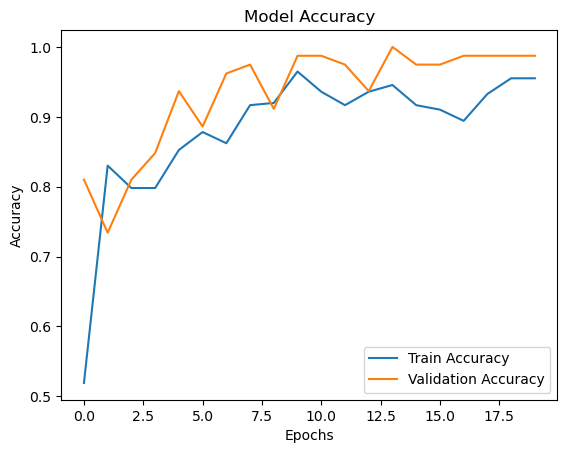

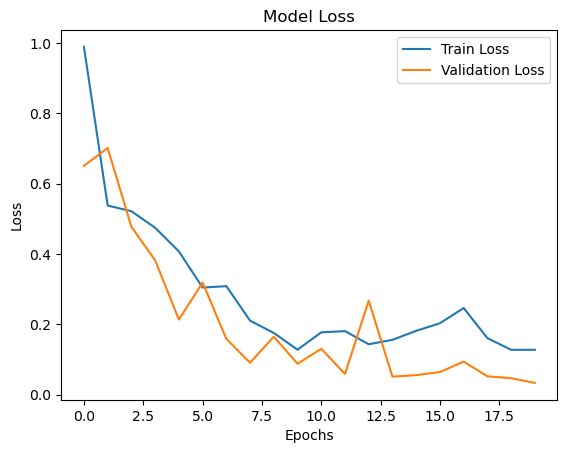

In [17]:

#  Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_onehot, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

#  Visualize training results
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [19]:
# Save the model
model.save('cnn_lstm_posture_model.h5')
print("Model saved successfully.")


Model saved successfully.


In [23]:
import mediapipe as mp
import cv2

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Initialize Pose object
pose = mp_pose.Pose()

# Open webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB (MediaPipe requires RGB input)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(rgb_frame)

    # Draw pose landmarks on the frame
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Display the frame
    cv2.imshow('Pose Detection', frame)

    # Press 'q' to exit
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [24]:
import mediapipe as mp
import cv2

# Load the saved model
from tensorflow.keras.models import load_model
model = load_model('cnn_lstm_posture_model.h5')

# MediaPipe setup
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Class mapping for predictions
class_mapping = {0: 'sitting', 1: 'standing', 2: 'walking'}

def predict_posture(landmarks_sequence):
    landmarks_sequence = np.array(landmarks_sequence)[np.newaxis, ..., np.newaxis]  # Reshape for model
    predictions = model.predict(landmarks_sequence)
    return class_mapping[np.argmax(predictions)]

# Open webcam or video
cap = cv2.VideoCapture(0)  # Change 0 to a video file path for testing on video
frame_count = 0
sequence = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(rgb_frame)

    if results.pose_landmarks:
        landmarks = np.array([[lm.x, lm.y, lm.z] for lm in results.pose_landmarks.landmark]).flatten()
        sequence.append(landmarks)

        # Predict every 30 frames
        if len(sequence) == 30:
            posture = predict_posture(sequence)
            sequence.pop(0)  # Maintain sequence length
            cv2.putText(frame, f"Posture: {posture}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the video
    cv2.imshow('Posture Detection', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):  # Press 'q' to exit
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model

# Load the trained CNN+LSTM model
model = load_model('cnn_lstm_posture_model.h5')

# Class mapping for predictions
class_mapping = {0: 'sitting', 1: 'standing', 2: 'walking'}

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose()

# Function to preprocess landmarks for prediction
def preprocess_landmarks(landmarks_sequence):
    # Add a channel dimension to the landmarks sequence
    return np.array(landmarks_sequence)[np.newaxis, ..., np.newaxis]

# Open webcam
cap = cv2.VideoCapture(1)
sequence = []  # Store the last 30 frames of landmarks

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB (MediaPipe requires RGB input)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(rgb_frame)

    # Draw pose landmarks on the frame
    if results.pose_landmarks:
        # Draw landmarks on the frame
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Extract pose landmarks as a flattened array
        landmarks = np.array([[lm.x, lm.y, lm.z] for lm in results.pose_landmarks.landmark]).flatten()

        # Append landmarks to the sequence
        sequence.append(landmarks)

        # Keep the last 30 frames
        if len(sequence) > 30:
            sequence.pop(0)

        # Predict the posture if we have 30 frames
        if len(sequence) == 30:
            preprocessed_sequence = preprocess_landmarks(sequence)
            predictions = model.predict(preprocessed_sequence)
            predicted_class = np.argmax(predictions)
            posture = class_mapping[predicted_class]

            # Display the prediction on the frame
            cv2.putText(frame, f"Posture: {posture}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    else:
        # If no pose landmarks detected
        cv2.putText(frame, "No pose detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the frame
    cv2.imshow('Pose Detection and Prediction', frame)

    # Press 'q' to exit
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━